# Slide-seq cell type ID using NMFreg
C. Heiser, August 2019

---
The purpose of this notebook is to generate pixellated images of cell type structure from slide-seq outputs.

In [1]:
import sys
sys.path.append('../')
from fcc import *

In [43]:
from NMFreg_utils import *

In [10]:
# reload fcc module while working
del sys.modules['fcc']
from fcc import *

In [18]:
# first, read DGE file and bead locations into `pita` object
# here, the bead locations have already been filtered by DGE indices, but if they aren't, you can run pita.filter_beads()
%time puck_180430_6 = pita.from_file(datafile='../../NMFreg_tutorial/data/counts.csv', cells_axis=0, beadfile='../../NMFreg_tutorial/data/coords.csv', data_type='counts')

CPU times: user 3min 39s, sys: 8.33 s, total: 3min 48s
Wall time: 3min 48s


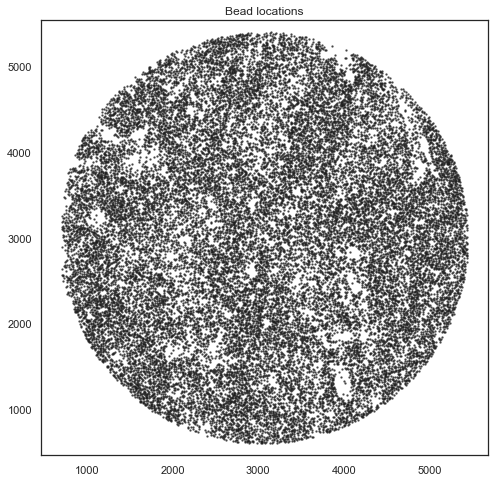

In [19]:
plt.figure(figsize=(8, 8))
plt.scatter(puck_180430_6.data['slide-seq']['xcoord'], puck_180430_6.data['slide-seq']['ycoord'], c='k', s=2, alpha=0.6)
plt.axis('equal')
plt.title("Bead locations")
plt.show()

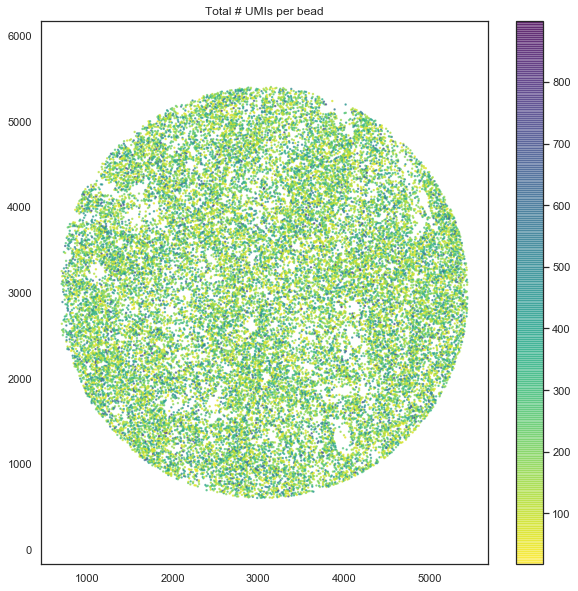

In [71]:
plt.figure(figsize=(10, 10))
plt.set_cmap('viridis_r')
plt.scatter(puck_180430_6.data['slide-seq']['xcoord'], puck_180430_6.data['slide-seq']['ycoord'], 
            c=np.sum(puck_180430_6.arcsinh_norm(data_type='counts'), axis=1), 
            s=2, alpha=0.6)
plt.colorbar()
plt.axis('equal')
plt.title("Total # UMIs per bead")
plt.show()

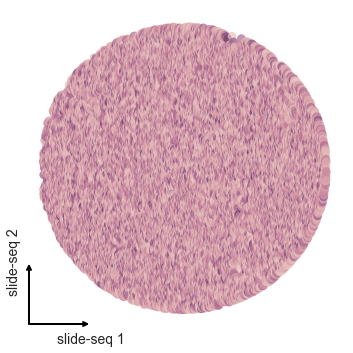

In [44]:
puck_180430_6.plot(data_type='slide-seq', feature_type='counts', features='total')

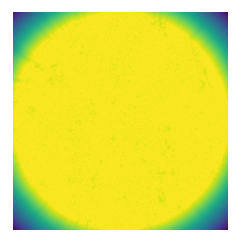

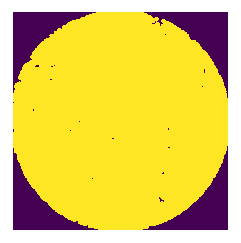

CPU times: user 34.3 s, sys: 554 ms, total: 34.9 s
Wall time: 34.2 s


In [45]:
%%time
# next, we want to map the beads to pixel-space, then trim the pixels by distance threshold using cKDTree from scipy.spatial
puck_180430_6.map_pixels()
puck_180430_6.trim_pixels(threshold=50)

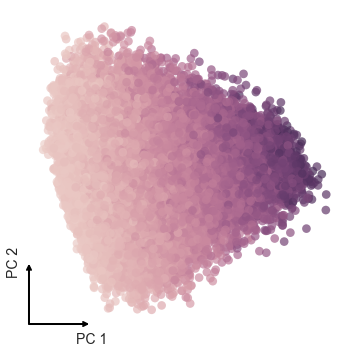

CPU times: user 2min 29s, sys: 16.8 s, total: 2min 46s
Wall time: 1min 39s


In [46]:
%%time 
# now we can perform a PCA on the beads, which represent regions of gene expression patterns in tissue
puck_180430_6.fcc_PCA(data_type='counts', n_components=10, transform='arcsinh')
puck_180430_6.plot(data_type='PCA')

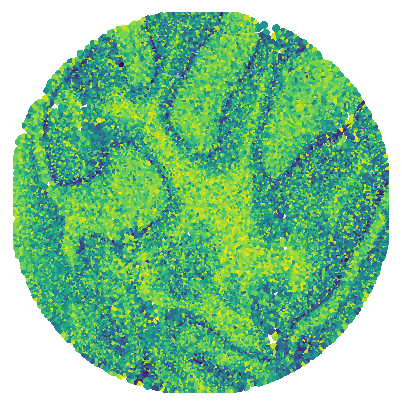

CPU times: user 7.57 s, sys: 145 ms, total: 7.71 s
Wall time: 7.4 s


In [52]:
# to reconstruct an image of the tissue, we can overlay the first principal component (data_type='PCA', feature=0) on our pixel-space
%time PC1 = puck_180430_6.assemble_pita(feature_type='PCA', features=0, plot_out=True)

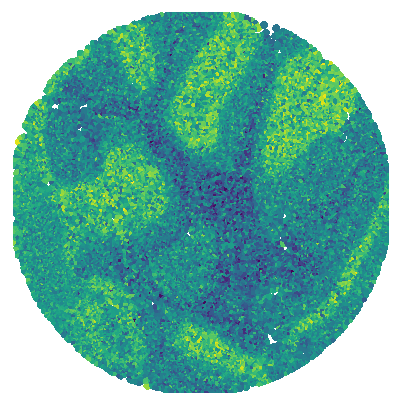

CPU times: user 7.79 s, sys: 170 ms, total: 7.96 s
Wall time: 7.65 s


In [51]:
# to reconstruct an image of the tissue, we can overlay the first principal component (data_type='PCA', feature=0) on our pixel-space
%time PC1 = puck_180430_6.assemble_pita(feature_type='PCA', features=1, plot_out=True)

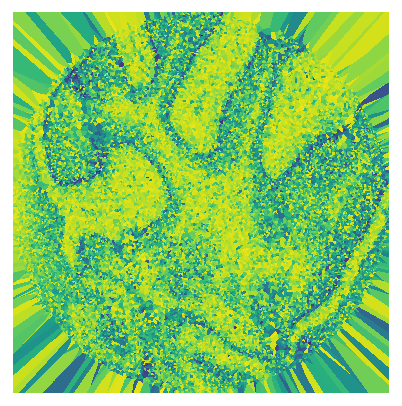

CPU times: user 18.8 s, sys: 4.74 s, total: 23.6 s
Wall time: 23.3 s


In [50]:
# to reconstruct an image of the tissue, we can overlay the first principal component (data_type='PCA', feature=0) on our pixel-space
%time total_counts = puck_180430_6.assemble_pita(feature_type='counts', features='total', transform='arcsinh', plot_out=True, trimmed=False)

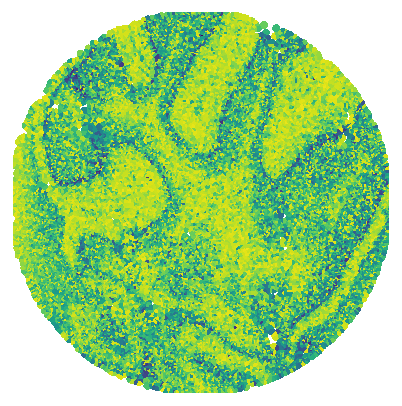

CPU times: user 19.7 s, sys: 4.89 s, total: 24.6 s
Wall time: 24.3 s


In [58]:
# to reconstruct an image of the tissue, we can overlay the first principal component (data_type='PCA', feature=0) on our pixel-space
%time total_counts = puck_180430_6.assemble_pita(feature_type='counts', features='total', transform='arcsinh', plot_out=True)

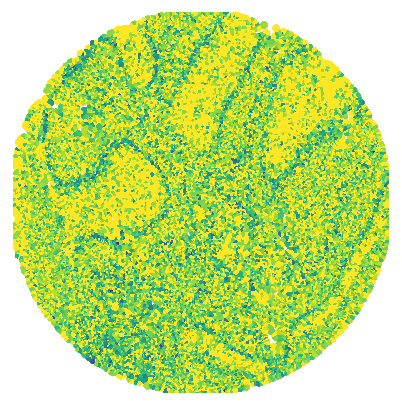

CPU times: user 17.3 s, sys: 4.1 s, total: 21.4 s
Wall time: 21.1 s


In [57]:
%%time
aldoc_metagene = ['Aldoc','Actb','Apoe','Atpla2','Atp1b2','Car7','Cd63','Cd81','Cox14','Cpne9','Cst3','Glul','Park7','Pigs','Soz9','Trf']
aldoc = puck_180430_6.assemble_pita(feature_type='counts', features=aldoc_metagene, transform='arcsinh', plot_out=True)

/Users/cody/.virtualenvs/lau_lab/lib/python3.7/site-packages/umap/rp_tree.py:450: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "make_euclidean_tree" failed type inference due to: Cannot unify RandomProjectionTreeNode(array(int64, 1d, C), bool, none, none, none, none) and RandomProjectionTreeNode(none, bool, array(float32, 1d, C), float64, RandomProjectionTreeNode(array(int64, 1d, C), bool, none, none, none, none), RandomProjectionTreeNode(array(int64, 1d, C), bool, none, none, none, none)) for '$14.16', defined at /Users/cody/.virtualenvs/lau_lab/lib/python3.7/site-packages/umap/rp_tree.py (457)

File "../../../.virtualenvs/lau_lab/lib/python3.7/site-packages/umap/rp_tree.py", line 457:
def make_euclidean_tree(data, indices, rng_state, leaf_size=30):
    <source elided>

        left_node = make_euclidean_tree(data, left_indices, rng_state, leaf_size)
        ^

[1] During: resolving callee type: recursive(type(CPUDispatcher(<funct

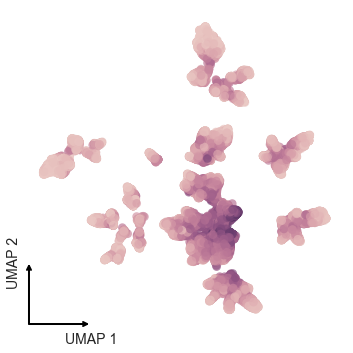

In [53]:
puck_180430_6.fcc_UMAP(data_type='PCA', perplexity=30)
puck_180430_6.plot(data_type='UMAP')

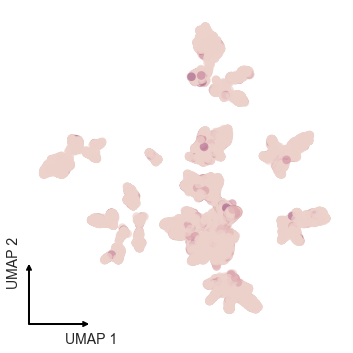

CPU times: user 10.1 s, sys: 3.72 s, total: 13.8 s
Wall time: 13.4 s


In [68]:
%time puck_180430_6.plot(data_type='UMAP', feature_type='counts', features=['Cck','Stmn4','Kcng4','Atp6ap11'])

In [22]:
atlas_dge = pd.read_csv('../../NMFreg_tutorial/data/dge_hvgs.csv')
cell_clusters = pd.read_csv('../../NMFreg_tutorial/data/cell_cluster_outcomes.csv')
cell_clusters.columns = ["barcode", "cluster", "subcluster", "reason"]

atlas_genes = atlas_dge.columns.tolist()

In [24]:
metacell_dict = {'1':"Granular",
                '2':"Purkinje",
                '3':"PV Interneurons",
                '4':"Other Interneurons",
                '5':"Microglia",
                '6':"Oligo- Poly-dendrocyte",
                '7':"Bergmann Glia",
                '8':"Astrocytes",
                '9':"Choroid Plexus",
                '10':"Endothelial Stalk",
                '11':"Muraland Tip"}
celltype_dict = {1:"Granular",
                2:"Purkinje",
                3:"PV Interneurons",
                4:"Other Interneurons",
                5:"Microglia",
                6:"Oligo- Poly-dendrocyte",
                7:"Bergmann Glia",
                8:"Astrocytes",
                9:"Choroid Plexus",
                10:"Endothelial Stalk",
                11:"Muraland Tip"}

plot_size_dict = {10:4}

ct_names = list(metacell_dict.values())

In [29]:
from sklearn.decomposition import NMF
from sklearn.preprocessing import StandardScaler

In [30]:
# need to have both the sample and the reference over a shared set of features
gene_intersection = list(set(atlas_genes) & set(puck_180430_6.feature_IDs))
atlasdge = atlas_dge[gene_intersection]

# preprocess the reference for NMF
cell_totalUMIa = np.sum(atlasdge, axis = 1)
atlasdge_cellnorm = np.divide(atlasdge, cell_totalUMIa[:,None])
atlasdge_scaled = StandardScaler(with_mean=False).fit_transform(atlasdge_cellnorm)

In [35]:
K=30

In [31]:
model = NMF(n_components=K, init='random', random_state=18)
Ha = model.fit_transform(atlasdge_scaled)
Wa = model.components_

In [32]:
Ha_norm = StandardScaler(with_mean=False).fit_transform(Ha)
Ha_norm = pd.DataFrame(Ha_norm)
Ha_norm['barcode'] = atlasdge.index.tolist()

In [33]:
maxloc = Ha_norm.drop('barcode', axis=1).values.argmax(axis=1)
cell_clusters['maxloc'] = maxloc
cell_clusters.head()

,barcode,cluster,subcluster,reason,maxloc
0,P60CBRep1P1_GACTCTACACCC,4,4-1,NaN,21
1,P60CBRep1P1_TATTATATCTAA,2,2,curation,25
2,P60CBRep1P1_GCGTCGCCAGTT,10,10-3,NaN,9
3,P60CBRep1P1_CTATCGATTTCN,2,2,curation,25
4,P60CBRep1P1_GTACCTGAGCCT,4,4-3,NaN,21


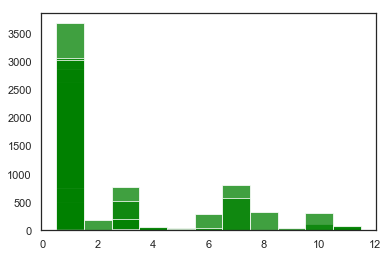

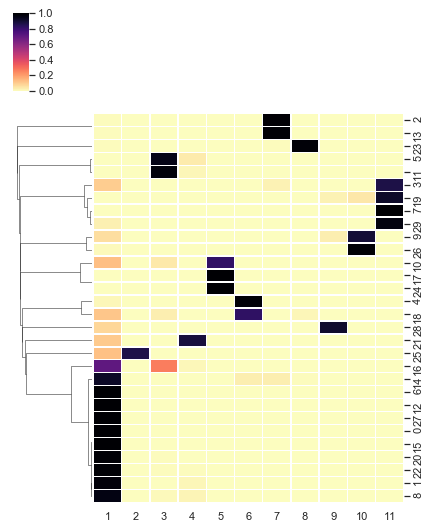

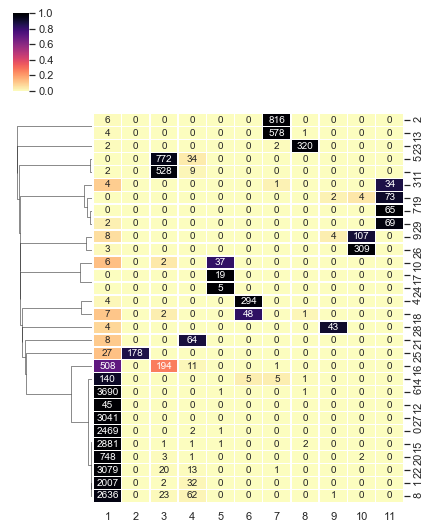

In [36]:
num_atlas_clusters = np.unique(cell_clusters['cluster']).size

factor_to_celltype_df = pd.DataFrame(0, index=range(1, num_atlas_clusters+1), 
                                     columns=range(K))
for k in range(K):
    n, bins, patches = plt.hist(cell_clusters['cluster'][cell_clusters['maxloc'] == k],
            range = (0.5, num_atlas_clusters+0.5), 
                                bins = int(num_atlas_clusters), 
                                facecolor='green', alpha=0.75)
    factor_to_celltype_df[k] = n.astype(int)
    
factor_to_celltype_df = factor_to_celltype_df.T

factor_total = np.sum(factor_to_celltype_df, axis = 1)
factor_to_celltype_df_norm = np.divide(factor_to_celltype_df, 
                                       factor_total[:,None])

cx = sns.clustermap(factor_to_celltype_df_norm, fmt = 'd',
                cmap="magma_r", linewidth=0.5, col_cluster = False,
                   figsize=(7, 9))

ax = sns.clustermap(factor_to_celltype_df_norm, fmt = 'd',
        cmap="magma_r", linewidth=0.5, col_cluster = False,
        annot = factor_to_celltype_df.loc[cx.dendrogram_row.reordered_ind],
        figsize=(7, 9))

maxloc_fc = factor_to_celltype_df.values.argmax(axis=1)
factor_to_celltype_dict = {factor : ctype + 1 for factor, ctype in enumerate(maxloc_fc)}

celltype_to_factor_dict = {}
for c in range(1, num_atlas_clusters + 1):
    celltype_to_factor_dict[c] = [k for k, v in factor_to_celltype_dict.items() if v == c]
    
WaT = Wa.T

Ha = pd.DataFrame(Ha)
Ha['cellname'] = atlasdge.index.tolist()

Ha_norm = StandardScaler(with_mean=False).fit_transform(Ha.drop('cellname', 
                                                                axis=1))

Ha_norm = pd.DataFrame(Ha_norm)
Ha_norm['cellname'] = atlasdge.index.tolist()

In [38]:
import collections

In [39]:
nonzero_beads = np.sum(puck_180430_6.data['counts'][gene_intersection], axis=1)!=0
counts = puck_180430_6.data['counts'][nonzero_beads]
coords = puck_180430_6.data['slide-seq'][nonzero_beads]
coords.reset_index(drop=True, inplace=True)

co = collections.Counter(factor_to_celltype_dict.values())

/Users/cody/.virtualenvs/lau_lab/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [42]:
cell_deconv_df, mismatch_dfl2, cell_maxct_df = cell_deconv(collapse='l2')

NameError: name 'Ha_norm' is not defined